In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("cleaned_retail_dataset.csv")

# Ensure date column is datetime type
df['order_date'] = pd.to_datetime(df['order_date'])

# Set the visual style
sns.set(style="whitegrid")

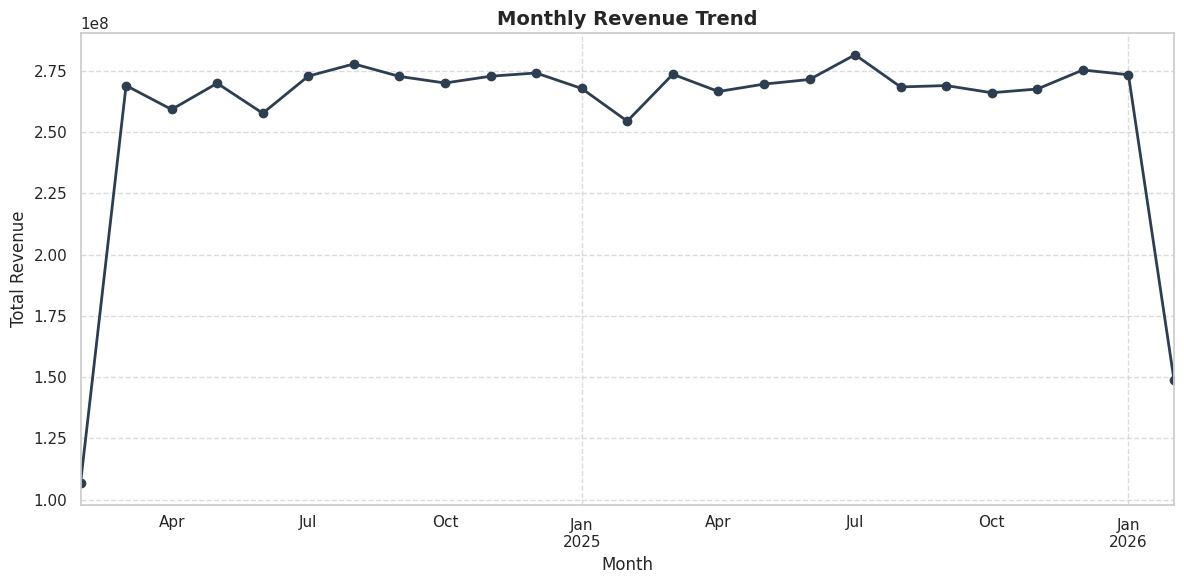

In [3]:
df['month_year'] = df['order_date'].dt.to_period('M')
monthly_revenue = df.groupby('month_year')['net_amount'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='#2c3e50', linewidth=2)
plt.title('Monthly Revenue Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3750312445.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='viridis')


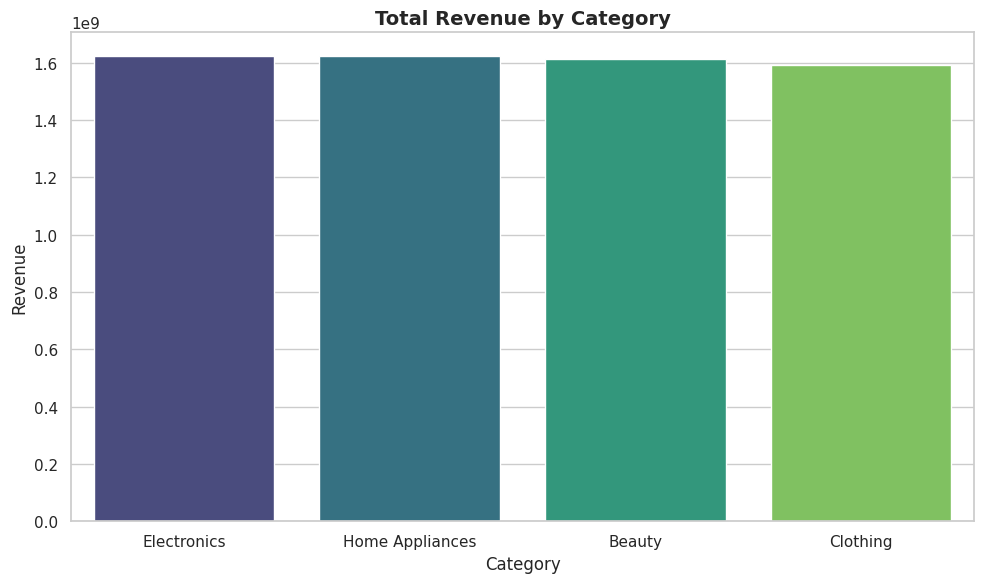

In [4]:
category_revenue = df.groupby('category')['net_amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='viridis')
plt.title('Total Revenue by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.tight_layout()
plt.show()

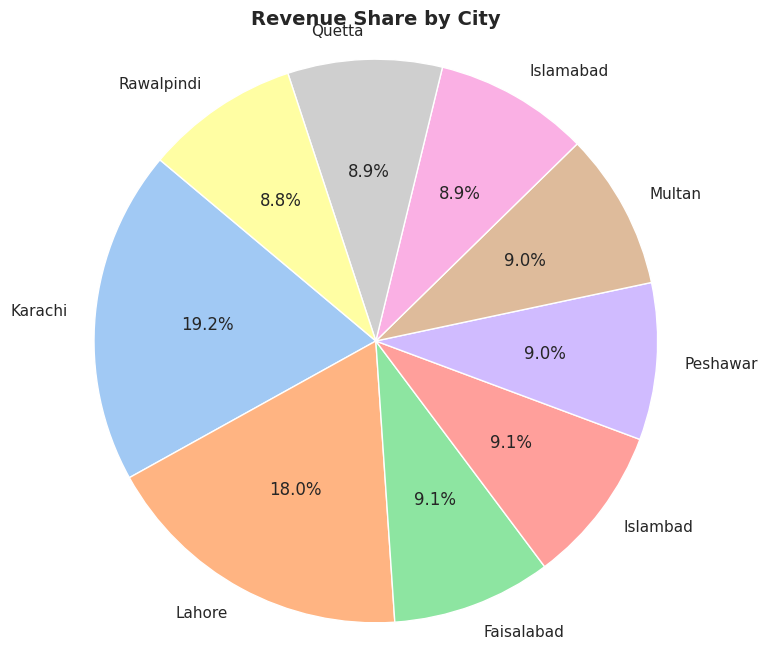

In [5]:
city_revenue = df.groupby('city')['net_amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(city_revenue, labels=city_revenue.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'white'})
plt.title('Revenue Share by City', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

/tmp/ipython-input-2874123435.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city', y='delivery_days', data=df, palette='coolwarm')


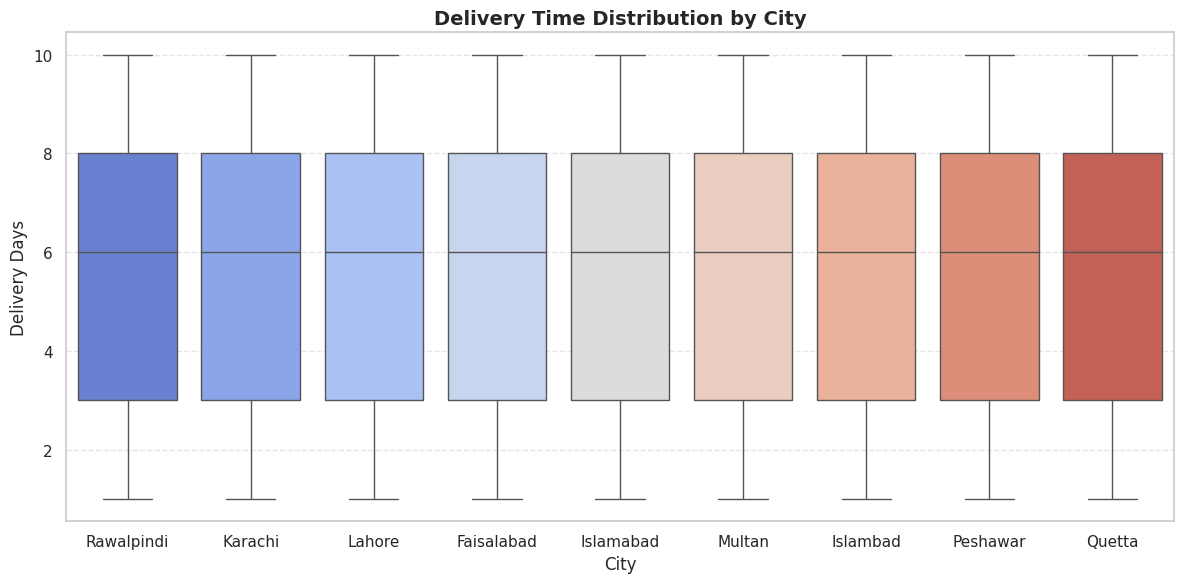

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='delivery_days', data=df, palette='coolwarm')
plt.title('Delivery Time Distribution by City', fontsize=14, fontweight='bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('Delivery Days', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()